In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
blk_size = 9
C = 5
img = cv2.imread('./img/sudoku.png', cv2.IMREAD_GRAYSCALE)

In [5]:
# 오츠의 알고리즘으로 단일 경계값을 전체 이미지에 적용
ret, th1 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# 적응형 스레시홀드를 평균으로 적용
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                           cv2.THRESH_BINARY, blk_size, C)

# 적응형 스레시홀드를 가우시안 분포로 적용
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                           cv2.THRESH_BINARY, blk_size, C)

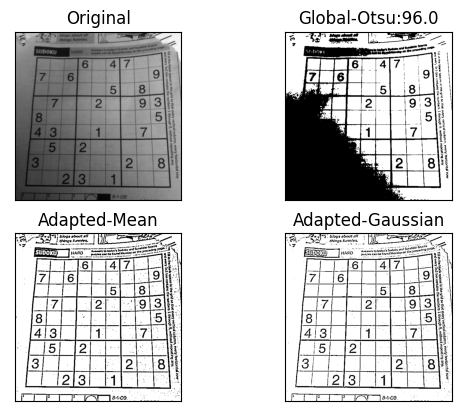

In [6]:
# 결과를 출력
imgs = {'Original':img, f'Global-Otsu:{ret}':th1, 
        'Adapted-Mean':th2, 'Adapted-Gaussian':th3}

for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2, 2, i+1)
    plt.title(k)
    plt.imshow(v, 'gray')
    plt.xticks([])
    plt.yticks([])
    
plt.show()